In [74]:
import numpy as np
import dynesty
from dynesty import utils as dyfunc
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc

In [76]:
data_dl_old = np.array([  40.53806137,   62.07017585,   61.0243238 , 69.31112943,
         86.25076898,  101.13069126,  116.81617341,  146.8192414 ,
        170.23269545,  201.3738048 ,  222.4861474 ,  280.98489615,
        318.50992938,  405.88497578,  465.31063183,  549.11458077,
        677.11584355,  768.00310486,  945.15486863, 1117.84857053,
       1349.22063847, 1578.1307268 , 2001.53401815, 2372.8100645 ,
       2906.58465084, 3471.22668519, 4242.51098787, 5223.03547744,
       6480.41734566, 8315.77970426, 9582.15023658])

In [77]:
data_dl = data_dl_old * 67.3 / 73

In [78]:
delta_dl = np.array([  2.72346151,   4.79634547,   2.20603503,   2.30946165,
         3.39449223,   2.61388012,   3.28521861,   3.83796674,
         4.45249119,   6.96847286,   9.51854653,   8.03423717,
         9.66313141,  10.21509654,  12.84279292,   9.4662071 ,
        12.04078295,  12.26860817,  13.98936404,  16.96826551,
        19.70873491,  28.53401192,  30.94814492,  45.37042514,
        52.69970136,  57.46065654, 122.65212034, 131.30859924,
       199.43646926, 592.06360303, 610.95412592])

In [79]:
data_z = np.array([0.01 , 0.012, 0.014, 0.016, 0.019, 0.023, 0.026, 0.031, 0.037,
       0.043, 0.051, 0.06 , 0.07 , 0.082, 0.097, 0.114, 0.134, 0.158,
       0.186, 0.218, 0.257, 0.302, 0.355, 0.418, 0.491, 0.578, 0.679,
       0.799, 0.94 , 1.105, 1.3  ])

In [80]:
N_obs = len(data_z)

In [81]:
# Define the dimensionality of our problem.
ndim = 3

#[]{}
            
def loglike(x):
    """The log-likelihood function."""    
    c = 3e5
    H0, q0, j0 = x
    
    model_dl = ((c*data_z)/H0)*(1+0.5*(1 - q0)*data_z-(1/6)*(1 - q0 - 3*q0**2 + j0)*data_z**2)
    
    first_term = -(N_obs/2) * np.log(2 * np.pi) - np.log(np.prod(delta_dl))
    second_term = -np.sum((1/(2 * delta_dl**2)) * (data_dl - model_dl)**2)
                          
    return(first_term + second_term)


# Define our uniform prior.
def ptform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

#    return 100. * (2. * u - 1.)
    hprime, qprime, jprime = u
    
#    h = 100. * (hprime)
#    q = 10. * (2. * qprime - 1.)
#    j = 10. * (2. * jprime - 1.)
    hmin = 0.
    hmax = 100.0

    qmin = -10.0
    qmax = 10.0

    jmin = -10.0
    jmax = 10.0
    
    
    h = hprime * (hmax - hmin) + hmin
    q = qprime * (qmax - qmin) + qmin
    j = jprime * (jmax - jmin) + jmin
    
    return(h, q, j)    

In [82]:
# "Static" nested sampling.
sampler = dynesty.NestedSampler(loglike, ptform, ndim, nlive=1500)
sampler.run_nested()
sresults = sampler.results

18317it [00:17, 1036.52it/s, +1500 | bound: 18 | nc: 1 | ncall: 93606 | eff(%): 21.515 | loglstar:   -inf < -126.949 <    inf | logz: -139.478 +/-  0.098 | dlogz:  0.001 >  1.509]


In [83]:
# "Dynamic" nested sampling.
dsampler = dynesty.DynamicNestedSampler(loglike, ptform, ndim)
dsampler.run_nested()
dresults = dsampler.results

16949it [00:18, 923.52it/s, batch: 7 | bound: 7 | nc: 1 | ncall: 56500 | eff(%): 29.710 | loglstar: -132.131 < -126.951 < -127.313 | logz: -139.533 +/-  0.097 | stop:  0.944]             


In [84]:
# Combine results from "Static" and "Dynamic" runs.
results = dyfunc.merge_runs([sresults, dresults])

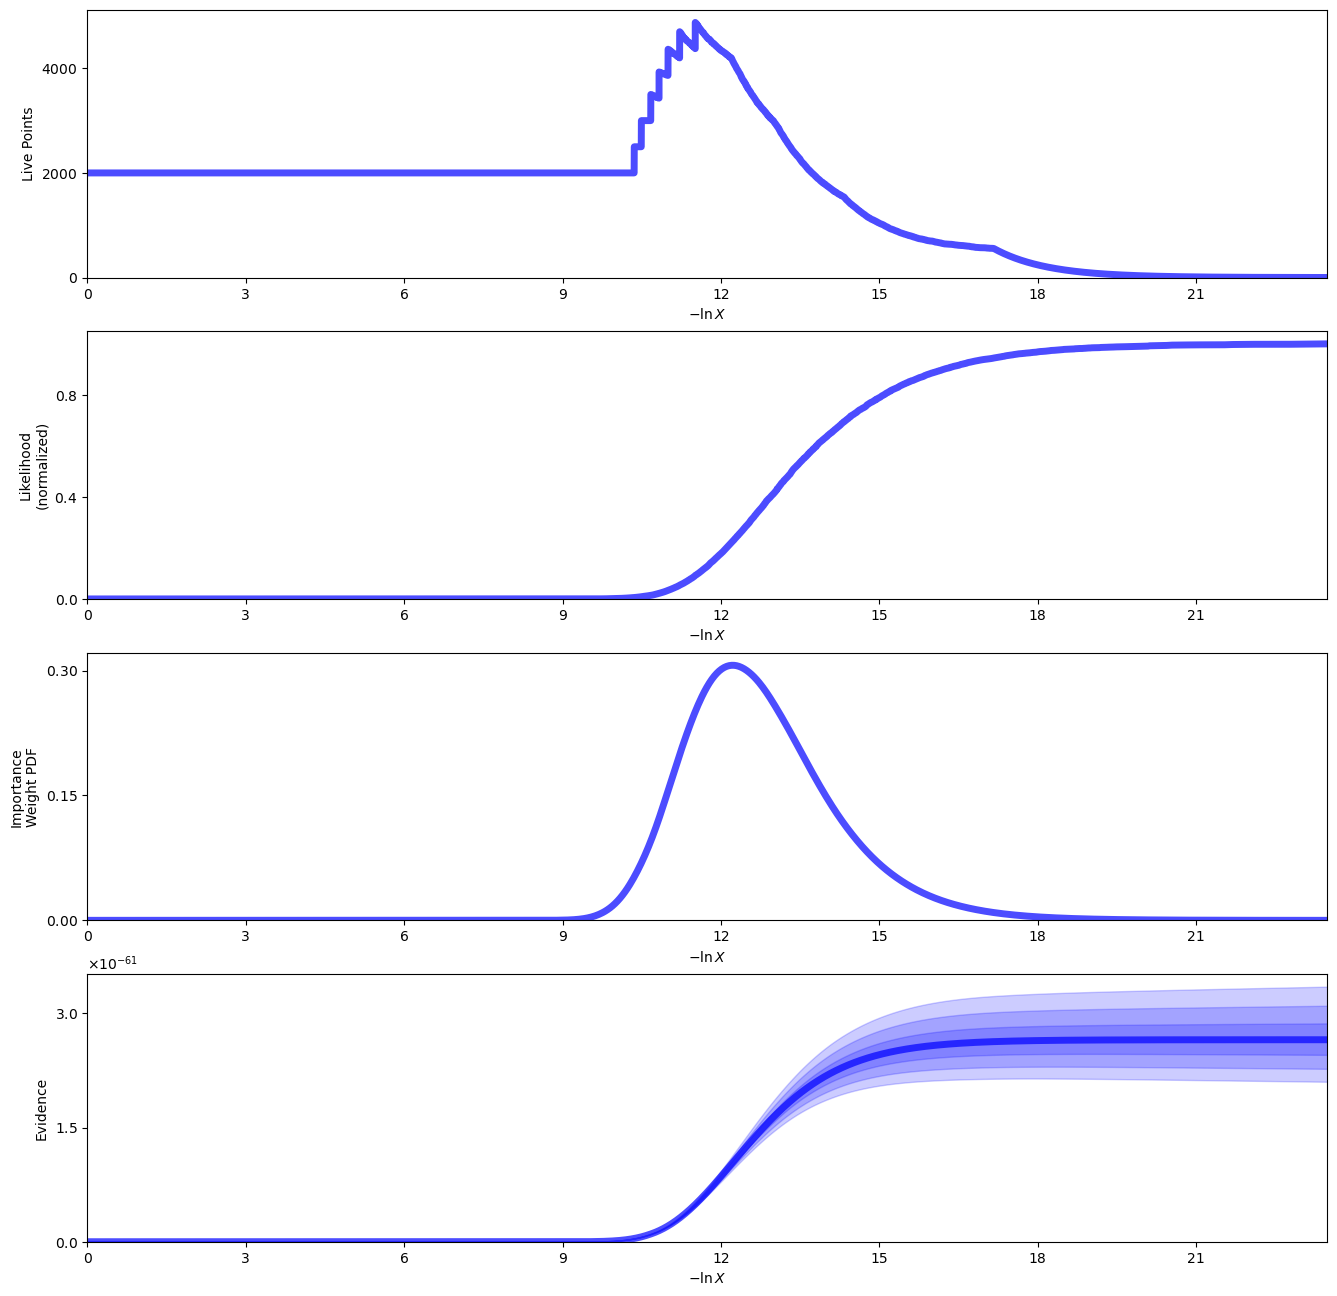

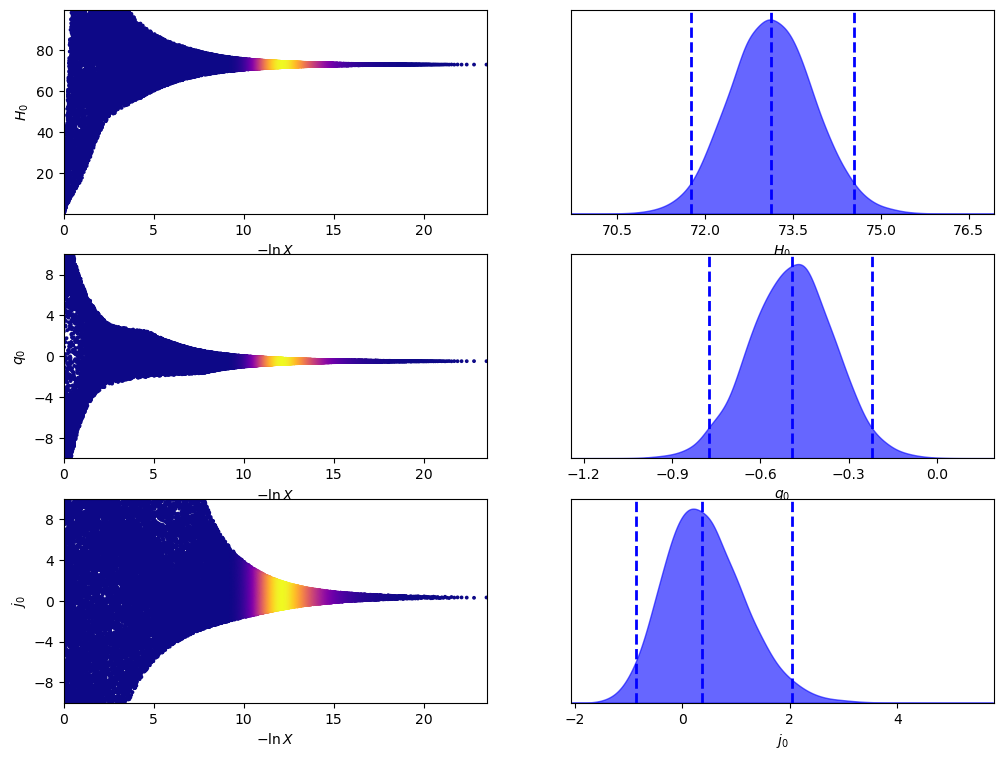

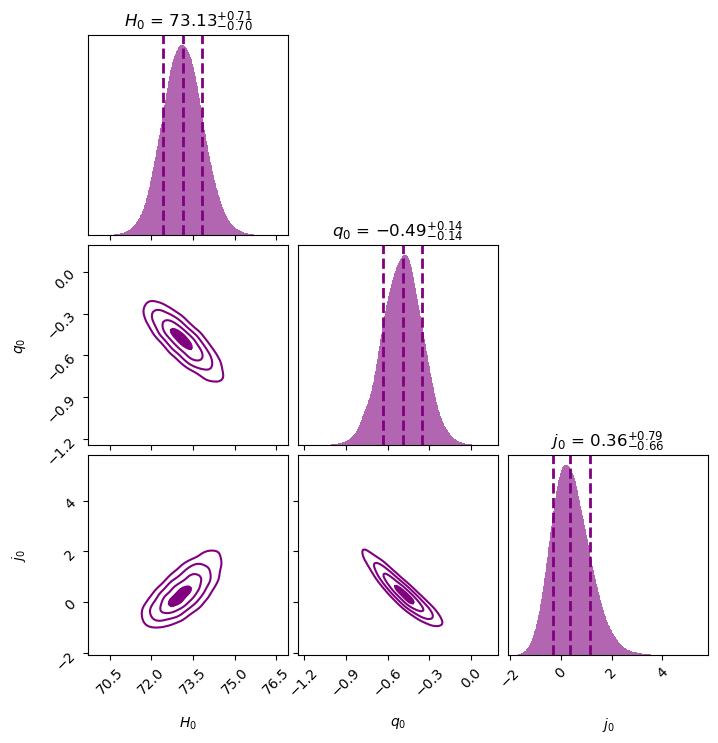

In [88]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results, labels=[r"$H_0$", r"$q_0$", r"$j_0$"])

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results, color = 'purple', labels=[r"$H_0$", r"$q_0$", r"$j_0$"], show_titles=True, quantiles=[0.16, 0.5, 0.84], title_quantiles=[0.16, 0.5, 0.84])